## Group No: 9

## Group Member Name:

## 1.Raahul N - 19S028

# 1. Import the required libraries

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# 2. Data Acquisition


## 2.1 Code for converting the above downloaded data into a dataframe



In [4]:

def load_reviews(directory):
    reviews = []
    labels = []
    for label in ['pos', 'neg']:
        path = os.path.join(directory, label)
        for filename in os.listdir(path):
            with open(os.path.join(path, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                reviews.append(text)
                labels.append(1 if label == 'pos' else 0)
    return reviews, labels

train_reviews, train_labels = load_reviews('/kaggle/input/imdb-reviews/aclImdb/train')
test_reviews, test_labels = load_reviews('/kaggle/input/imdb-reviews/aclImdb/test')

train_df = pd.DataFrame({'text': train_reviews, 'label': train_labels})
test_df = pd.DataFrame({'text': test_reviews, 'label': test_labels})

In [5]:
train_df

,text,label
0,This was one of those wonderful rare moments i...,1
1,Have you seen The Graduate? It was hailed as t...,1
2,"I don't watch a lot of TV, except for The Offi...",1
3,Kubrick again puts on display his stunning abi...,1
4,"First of all, I liked very much the central id...",1
...,...,...
24995,The first hour of the movie was boring as hell...,0
24996,"A fun concept, but poorly executed. Except for...",0
24997,I honestly don't understand how tripe like thi...,0
24998,This remake of the 1962 orginal film'o the boo...,0


## Size of the dataset

In [6]:
train_df.shape

(25000, 2)

## Type of data attributes

In [7]:
data_attributes = train_df.columns.tolist()
print("Data attributes:", data_attributes)

Data attributes: ['text', 'label']


## Plot the distribution of the categories of the label.

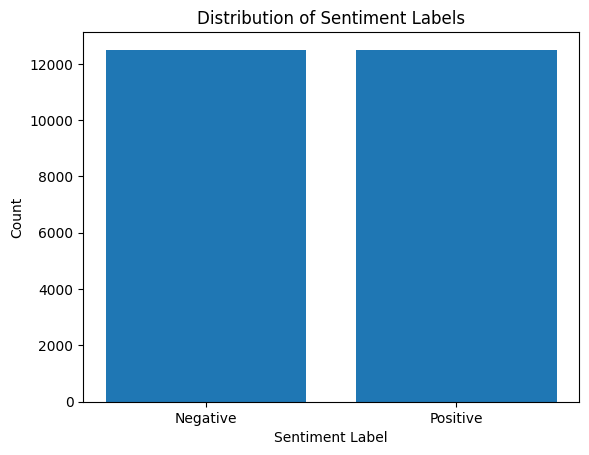

In [8]:
target = train_df['label'].value_counts()

plt.bar(target.index, target.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Distribution of Sentiment Labels')
plt.show()

# 3. Data Preparation

## 3.1 Pre-processing techiniques


* Stop word removal
* Word tokenize
* Lower the text
* Remove punctuation
* Vectorization
* Padding

In [9]:
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    return ' '.join(words)

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

In [10]:
max_words = 10000
max_sequence_length = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

## 3.2 Spliting the data into training set and testing set

In [11]:
X_train, X_val, y_train, y_val = train_test_split(train_sequences, train_df['label'], test_size=0.2, random_state=42)

## 3.3 Preprocessing report

In [12]:
X_train.shape[0]

20000

In [13]:
X_val.shape[0]

5000

# 4. Deep Neural Network Architecture

  ## 4.1 Architecture design

The layers used for my models are,

Dense Layer :

A dense layer is a fundamental layer in DNNs where each neuron is connected to every neuron in the previous layer.It performs a linear transformation followed by an activation function (e.g., ReLU or sigmoid).Dense layers are used for feature extraction and representation learning.They can have varying numbers of neurons, allowing you to control the model's capacity.

Flatten Layer:

A flatten layer is used to transform multi-dimensional input (e.g., image tensors) into a 1D vector.

Embeddng Layer:

In a Deep Neural Network (DNN), an "Embedding Layer" is a type of layer that is commonly used when working with categorical data or text data. It is particularly useful for converting discrete inputs into continuous vector representations that the neural network can work with.

In [23]:
model = tf.keras.Sequential([
    Embedding(input_dim=max_words, output_dim=16, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

## 4.2 DNN Report

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                204864    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 364,929
Trainable params: 364,929
Non-trainable params: 0
_________________________________________________________________


# 5. Training the model

## 5.1 Configure the training

In [25]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

## 5.2 Train the model

In [26]:
batch_size = 64
epochs = 20
history = model.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=epochs,batch_size=batch_size)

Epoch 1/20
313/313 [==============================] - 5s 11ms/step - loss: 0.6930 - accuracy: 0.5087 - val_loss: 0.6923 - val_accuracy: 0.5216
Epoch 2/20
313/313 [==============================] - 3s 11ms/step - loss: 0.6925 - accuracy: 0.5201 - val_loss: 0.6920 - val_accuracy: 0.5274
Epoch 3/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6921 - accuracy: 0.5276 - val_loss: 0.6918 - val_accuracy: 0.5268
Epoch 4/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6916 - accuracy: 0.5293 - val_loss: 0.6915 - val_accuracy: 0.5340
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6911 - accuracy: 0.5339 - val_loss: 0.6913 - val_accuracy: 0.5294
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6907 - accuracy: 0.5337 - val_loss: 0.6911 - val_accuracy: 0.5308
Epoch 7/20
313/313 [==============================] - 3s 11ms/step - loss: 0.6903 - accuracy: 0.5340 - val_loss: 0.6908 - val_accuracy: 0.5302

# 6. Testing the model

In [31]:
input_text = "this movie is good"
input_text= preprocess_text(input_text)

input_sequence = tokenizer.texts_to_sequences([input_text])
input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_length, padding='post', truncating='post')

In [32]:
prediction = model.predict(input_sequence)[0, 0]

if prediction >= 0.5:
    print("Positive sentiment")
else:
    print("Negative sentiment")

1/1 [==============================] - 0s 26ms/step
Positive sentiment


# 7. Intermediate result

.
## 7.1 The training and validation loss history,Plot the training and validation accuracy history and Report the testing accuracy and loss.



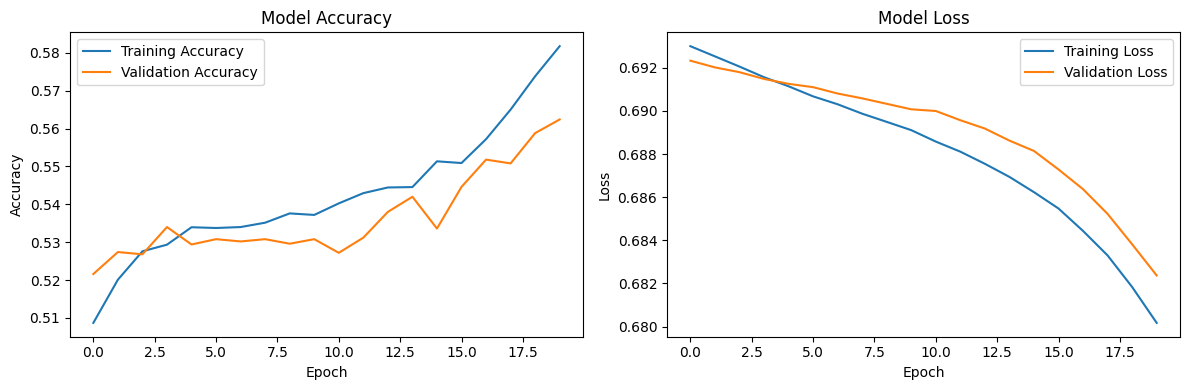

In [33]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 7.2 Confusion Matrix for testing dataset.


782/782 [==============================] - 2s 3ms/step


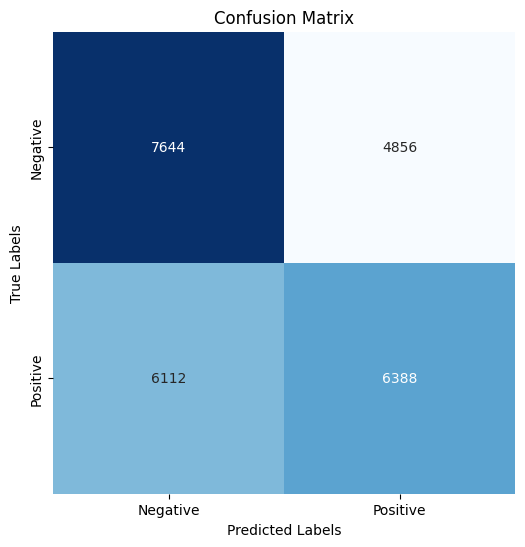

In [34]:

test_predictions = model.predict(test_sequences)
test_predictions = (test_predictions >= 0.5).astype(int)


confusion = confusion_matrix(test_df['label'], test_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 7.3 Preformance study metrics like accuracy, precision, recall, F1 Score.

In [35]:
accuracy = accuracy_score(test_df['label'], test_predictions)
precision = precision_score(test_df['label'], test_predictions)
recall = recall_score(test_df['label'], test_predictions)
f1 = f1_score(test_df['label'], test_predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.5613
Precision: 0.5681
Recall: 0.5110
F1 Score: 0.5381


# 8. Model architecture


## 8.1.1 Modify the architecture designed in section 4.1

1. By decreasing one layer


In [37]:
model1 = tf.keras.Sequential([
    Embedding(input_dim=max_words, output_dim=16, input_length=max_sequence_length),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
batch_size = 64
epochs = 20

history1 = model1.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=epochs,batch_size=batch_size)

Epoch 1/20
313/313 [==============================] - 3s 8ms/step - loss: 0.6928 - accuracy: 0.5120 - val_loss: 0.6930 - val_accuracy: 0.5114
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 0.6923 - accuracy: 0.5185 - val_loss: 0.6928 - val_accuracy: 0.5132
Epoch 3/20
313/313 [==============================] - 2s 8ms/step - loss: 0.6919 - accuracy: 0.5222 - val_loss: 0.6925 - val_accuracy: 0.5166
Epoch 4/20
313/313 [==============================] - 2s 8ms/step - loss: 0.6916 - accuracy: 0.5249 - val_loss: 0.6924 - val_accuracy: 0.5200
Epoch 5/20
313/313 [==============================] - 2s 8ms/step - loss: 0.6912 - accuracy: 0.5292 - val_loss: 0.6922 - val_accuracy: 0.5164
Epoch 6/20
313/313 [==============================] - 2s 8ms/step - loss: 0.6909 - accuracy: 0.5297 - val_loss: 0.6920 - val_accuracy: 0.5208
Epoch 7/20
313/313 [==============================] - 3s 8ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.6919 - val_accuracy: 0.5216
Epoch 

## 8.1.2 Modify the architecture designed in section 4.1

2. By Increasing one layer

In [39]:
model2 = tf.keras.Sequential([
    Embedding(input_dim=max_words, output_dim=16, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
batch_size = 64
epochs = 20

history2 = model2.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=epochs,batch_size=batch_size)

Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6926 - accuracy: 0.5166 - val_loss: 0.6930 - val_accuracy: 0.5142
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6923 - accuracy: 0.5237 - val_loss: 0.6927 - val_accuracy: 0.5126
Epoch 4/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6919 - accuracy: 0.5252 - val_loss: 0.6926 - val_accuracy: 0.5196
Epoch 5/20
313/313 [==============================] - 3s 11ms/step - loss: 0.6916 - accuracy: 0.5329 - val_loss: 0.6924 - val_accuracy: 0.5240
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6912 - accuracy: 0.5329 - val_loss: 0.6922 - val_accuracy: 0.5246
Epoch 7/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6909 - accuracy: 0.5347 - val_loss: 0.6921 - val_accuracy: 0.5212

## 8.2 The comparison of the training and validation accuracy of the three architecure

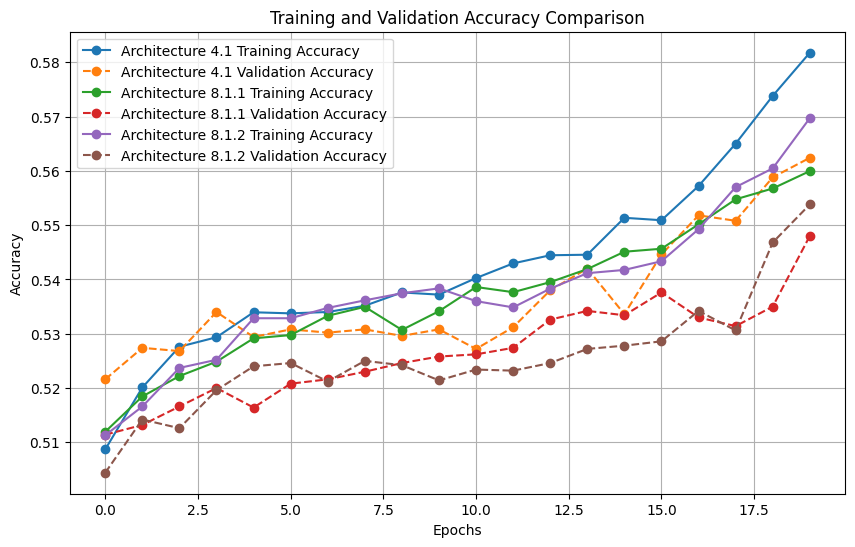

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Architecture 4.1 Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Architecture 4.1 Validation Accuracy', linestyle='--', marker='o')
plt.plot(history1.history['accuracy'], label='Architecture 8.1.1 Training Accuracy', linestyle='-', marker='o')
plt.plot(history1.history['val_accuracy'], label='Architecture 8.1.1 Validation Accuracy', linestyle='--', marker='o')
plt.plot(history2.history['accuracy'], label='Architecture 8.1.2 Training Accuracy', linestyle='-', marker='o')
plt.plot(history2.history['val_accuracy'], label='Architecture 8.1.2 Validation Accuracy', linestyle='--', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 9. Regularisations


Regularization in Deep Learning (DL) refers to a set of techniques used to prevent a neural network from overfitting the training data. Overfitting occurs when a model learns to perform exceptionally well on the training data but fails to generalize to unseen data. Regularization methods aim to encourage the neural network to have a simpler, more generalized representation rather than memorizing the training data.


## 9.1.1 Modify the architecture designed in section 4.1
1. Dropout of ratio 0.25

Dropout layer:
The Dropout layer is a regularization technique used in Deep Neural Networks (DNNs) to reduce overfitting. Overfitting occurs when a model learns to perform exceptionally well on the training data but fails to generalize to unseen data. Dropout is a simple yet effective method to combat overfitting by preventing the network from relying too heavily on any one neuron or feature.

In [42]:
model3 = tf.keras.Sequential([
    Embedding(input_dim=max_words, output_dim=16, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.25), 
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history3 = model3.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=epochs,batch_size=batch_size)

Epoch 1/20
313/313 [==============================] - 4s 10ms/step - loss: 0.6935 - accuracy: 0.4976 - val_loss: 0.6935 - val_accuracy: 0.4934
Epoch 2/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6930 - accuracy: 0.5094 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6928 - accuracy: 0.5093 - val_loss: 0.6930 - val_accuracy: 0.5166
Epoch 4/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6926 - accuracy: 0.5159 - val_loss: 0.6929 - val_accuracy: 0.5066
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6923 - accuracy: 0.5211 - val_loss: 0.6927 - val_accuracy: 0.5188
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6919 - accuracy: 0.5270 - val_loss: 0.6925 - val_accuracy: 0.5206
Epoch 7/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6919 - accuracy: 0.5248 - val_loss: 0.6923 - val_accuracy: 0.5178
E

## 9.1.2 Modify the architecture designed in section 4.1

2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

L2 regularization adds a penalty term that encourages the model's weights to be small but does not enforce sparsity.
These techniques help prevent overfitting by discouraging overly complex models.


In [44]:
model4 = tf.keras.Sequential([
    Embedding(input_dim=max_words, output_dim=16, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.25),  
    Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-04))  
])

model4.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history4 = model4.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=epochs,batch_size=batch_size)

Epoch 1/20
313/313 [==============================] - 4s 10ms/step - loss: 0.6937 - accuracy: 0.5001 - val_loss: 0.6935 - val_accuracy: 0.4992
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6933 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.5066
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6927 - accuracy: 0.5178 - val_loss: 0.6931 - val_accuracy: 0.5142
Epoch 4/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6926 - accuracy: 0.5209 - val_loss: 0.6930 - val_accuracy: 0.5198
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6923 - accuracy: 0.5224 - val_loss: 0.6928 - val_accuracy: 0.5256
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6920 - accuracy: 0.5255 - val_loss: 0.6926 - val_accuracy: 0.5276
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6915 - accuracy: 0.5280 - val_loss: 0.6925 - val_accuracy: 0.5196
Ep

## 9.2 The comparison of the training and validation accuracy of the three (4.1, 9.1.1 and 9.1.2)

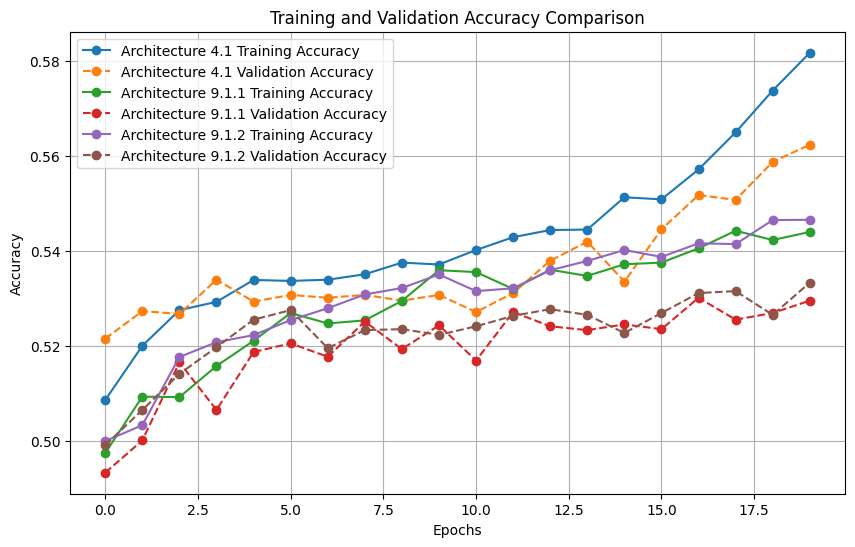

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Architecture 4.1 Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Architecture 4.1 Validation Accuracy', linestyle='--', marker='o')
plt.plot(history3.history['accuracy'], label='Architecture 9.1.1 Training Accuracy', linestyle='-', marker='o')
plt.plot(history3.history['val_accuracy'], label='Architecture 9.1.1 Validation Accuracy', linestyle='--', marker='o')
plt.plot(history4.history['accuracy'], label='Architecture 9.1.2 Training Accuracy', linestyle='-', marker='o')
plt.plot(history4.history['val_accuracy'], label='Architecture 9.1.2 Validation Accuracy', linestyle='--', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 10. Optimisers

An optimizer is an algorithm or function that adapts the neural network’s attributes, like learning rate and weights. Hence, it assists in improving the accuracy and reduces the total loss. But it is a daunting task to choose the appropriate weights for the model.


## 10.1.1 Modify the code written in section 5.2

1. RMSProp (Root Mean Square Propagation):

RMSprop addresses the slow convergence issue of Adagrad by using a moving average of squared gradients.It adapts the learning rates per parameter based on the recent gradient history.

In [47]:
model5 = tf.keras.Sequential([
    Embedding(input_dim=max_words, output_dim=16, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
history5=model5.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=epochs,batch_size=batch_size)

Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 0.4885 - accuracy: 0.7513 - val_loss: 0.3150 - val_accuracy: 0.8666
Epoch 2/20
313/313 [==============================] - 4s 11ms/step - loss: 0.2401 - accuracy: 0.9064 - val_loss: 0.2797 - val_accuracy: 0.8850
Epoch 3/20
313/313 [==============================] - 3s 11ms/step - loss: 0.1494 - accuracy: 0.9459 - val_loss: 0.3070 - val_accuracy: 0.8764
Epoch 4/20
313/313 [==============================] - 3s 11ms/step - loss: 0.0748 - accuracy: 0.9760 - val_loss: 0.3643 - val_accuracy: 0.8706
Epoch 5/20
313/313 [==============================] - 3s 11ms/step - loss: 0.0288 - accuracy: 0.9921 - val_loss: 0.4387 - val_accuracy: 0.8656
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 0.5198 - val_accuracy: 0.8614
Epoch 7/20
313/313 [==============================] - 3s 11ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.6101 - val_accuracy: 0.8554

## 10.1.2 Modify the code written in section 5.2

2. Adam(Adaptive Moment Estimation):

Adam combines the advantages of momentum and RMSprop.It uses both moving averages of past gradients and squared gradients to adaptively adjust the learning rates for each parameter.Adam is one of the most popular and widely used optimizers due to its robustness and effectiveness.



In [48]:
model6 = tf.keras.Sequential([
    Embedding(input_dim=max_words, output_dim=16, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history6=model6.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=epochs,batch_size=batch_size)

Epoch 1/20
313/313 [==============================] - 5s 14ms/step - loss: 0.4599 - accuracy: 0.7588 - val_loss: 0.3111 - val_accuracy: 0.8646
Epoch 2/20
313/313 [==============================] - 4s 12ms/step - loss: 0.1712 - accuracy: 0.9372 - val_loss: 0.3029 - val_accuracy: 0.8788
Epoch 3/20
313/313 [==============================] - 4s 14ms/step - loss: 0.0473 - accuracy: 0.9894 - val_loss: 0.3850 - val_accuracy: 0.8736
Epoch 4/20
313/313 [==============================] - 4s 14ms/step - loss: 0.0101 - accuracy: 0.9991 - val_loss: 0.4400 - val_accuracy: 0.8732
Epoch 5/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.4818 - val_accuracy: 0.8710
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5155 - val_accuracy: 0.8720
Epoch 7/20
313/313 [==============================] - 4s 12ms/step - loss: 6.5157e-04 - accuracy: 1.0000 - val_loss: 0.5385 - val_accuracy: 0.

## 10.2 The comparison of the training and validation accuracy of the three (5.2, 10.1.1 and 10.1.2)

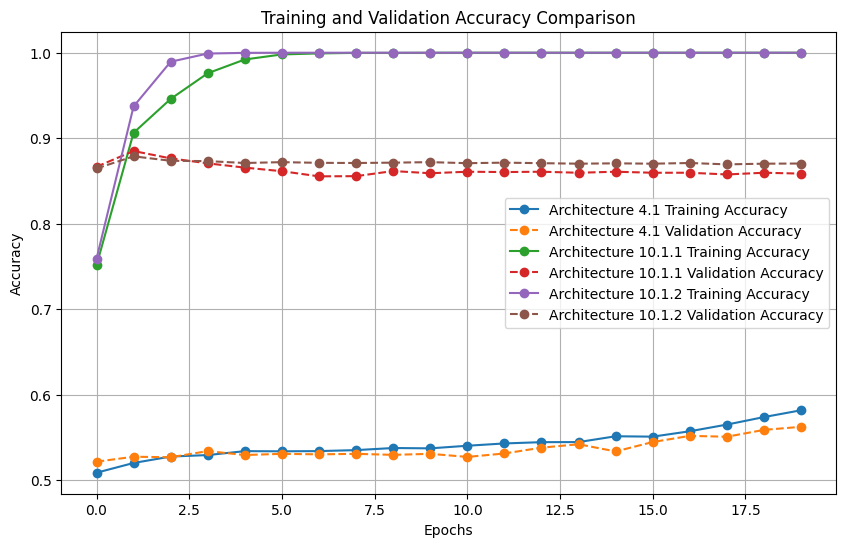

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Architecture 4.1 Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Architecture 4.1 Validation Accuracy', linestyle='--', marker='o')
plt.plot(history5.history['accuracy'], label='Architecture 10.1.1 Training Accuracy', linestyle='-', marker='o')
plt.plot(history5.history['val_accuracy'], label='Architecture 10.1.1 Validation Accuracy', linestyle='--', marker='o')
plt.plot(history6.history['accuracy'], label='Architecture 10.1.2 Training Accuracy', linestyle='-', marker='o')
plt.plot(history6.history['val_accuracy'], label='Architecture 10.1.2 Validation Accuracy', linestyle='--', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 11. Conclusion

By comparing all the models trained I came to the cconlusion that the model used in the section 10.1 with the Adam has the high accuracy in the valdation. Thus, I conclude by saying that following can improve our validation score.

Model: The model in 4.1 without adding any layer has high validation accuracy so we can use the same model.

Architecture: The model in 4.1 without adding any layer has high validation accuracy so we can use the same model.

optimizer: Adam has high validation accuracy then rmsprop. so we can use Adam as optimzer.

Regularization: Use initial model without any dropout layer becase it has high validation accuracy.
